<center><h1>Demo usage</h1></center>

## Beat tracking from MIDI performance recording

In [12]:
from pm2s.features.beat import RNNJointBeatProcessor
import mir_eval
import pretty_midi as pm

# Get one MIDI recording from the A_MAPS dataset
midi_recording = '../../datasets/A-MAPS_1.1/MAPS_MUS-bk_xmas1_ENSTDkCl.mid'

# Create a beat processor
processor = RNNJointBeatProcessor()

# Process the MIDI recording to the beat predictions
beats_pred = processor.process(midi_recording)

# Ground truth beats
midi_data = pm.PrettyMIDI(midi_recording)
beats_targ = midi_data.get_beats()

# F-measure for beat tracking
beats_pred_trimmed = mir_eval.beat.trim_beats(beats_pred)
beats_targ_trimmed = mir_eval.beat.trim_beats(beats_targ)
f1 = mir_eval.beat.f_measure(beats_targ_trimmed, beats_pred_trimmed)

print('First 10 predicted beats:')
print(beats_pred[:10])
print('First 10 target beats:')
print(beats_targ[:10])
print('F1 score for beat tracking: {}'.format(f1))

0.5 0.3230769230769231
First 10 predicted beats:
[0.52443221 1.70926167 2.34013667 2.90572772 3.47131877 4.12937942
 4.71532387 5.30126833 5.9341265  6.50396   ]
First 10 target beats:
[ 0.        0.521985  2.33897   4.12696   5.93296   7.72494   9.50692
 11.2709   13.0589   14.8519  ]
F1 score for beat tracking: 0.888412017167382


Plot the beat prediction and piano roll for a short segment:

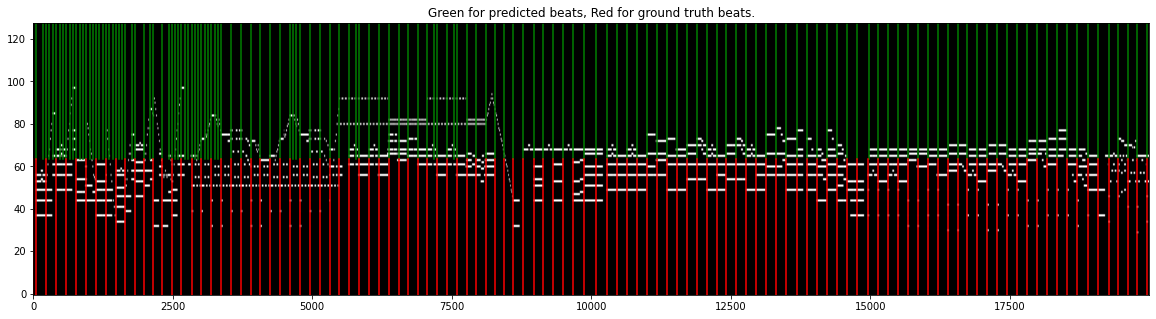

In [15]:
import numpy as np
import pretty_midi as pm
import matplotlib.pyplot as plt

def get_piano_roll(midi_file, start_time, end_time):

    pr = np.zeros((128, int((end_time - start_time) * 100)))

    for instrument in pm.PrettyMIDI(midi_file).instruments:
        for note in instrument.notes:
            if note.start >= end_time or note.end <= start_time:
                continue
            start = int((note.start - start_time) * 100)
            end = int((note.end - start_time) * 100)

            pr[note.pitch, start:end] = 1
    
    return pr

midi_data = pm.PrettyMIDI(midi_recording)
beats_targ = midi_data.get_beats()

start_time, end_time = 0, 200
beats_pred_seg = beats_pred[np.logical_and(beats_pred >= start_time, beats_pred <= end_time)]
beats_targ_seg = beats_targ[np.logical_and(beats_targ >= start_time, beats_targ <= end_time)]
pr_seg = get_piano_roll(midi_recording, start_time, end_time)

plt.figure(figsize=(20, 5))
plt.imshow(pr_seg, aspect='auto', origin='lower', cmap='gray')
for b in beats_pred_seg:
    plt.axvline(x=(b - start_time) * 100, ymin=0.5, ymax=1, color='g')
for b in beats_targ_seg:
    plt.axvline(x=(b - start_time) * 100, ymin=0, ymax=0.5, color='r')
plt.title('Green for predicted beats, Red for ground truth beats.')
plt.show()

## Quantisation from a MIDI performance

In [22]:

from pm2s.features.quantisation import RNNJointQuantisationProcessor
import pretty_midi as pm


# Get one MIDI recording from the A_MAPS dataset
midi_recording = '/import/c4dm-05/ll307/datasets/A-MAPS_1.1/MAPS_MUS-bk_xmas1_ENSTDkCl.mid'

# Create a quantisation processor
processor = RNNJointQuantisationProcessor()

# Process the MIDI recording to the beat predictions
beats, onset_positions, note_values = processor.process(midi_recording)
print('onset positions and note values in number of beats:')
print(onset_positions[:20])
print(note_values[:20])

onset positions and note values in number of beats:
[0.         0.         1.         1.         1.         2.5
 3.5        4.66666667 4.66666667 4.66666667 4.66666667 4.66666667
 5.         6.         6.         6.         6.08333333 7.16666667
 8.25       8.33333333]
[0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.16666667
 0.16666667 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.08333333 0.66666667 0.66666667 0.66666667 0.08333333 0.08333333
 0.08333333 0.08333333]
